<a href="https://colab.research.google.com/github/MRazin172/LabProgram5/blob/main/2348534_Program5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [5]:
data=pd.read_csv("/content/program_5_dataset.csv")

In [6]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
data.shape

(615, 14)

In [8]:
data.isnull()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [10]:
datanew=data.dropna()

In [11]:
datanew.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

We are dropping the columns with null values so that it wouldnot decrease the accuracy of the model

In [12]:
datanew.shape

(580, 14)

In [13]:
datanew.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

#SIMPLE LINEAR REGRESSION

In [14]:
X = datanew[['CREA']]  # Predictor variable is CREA
y = datanew['PROT']

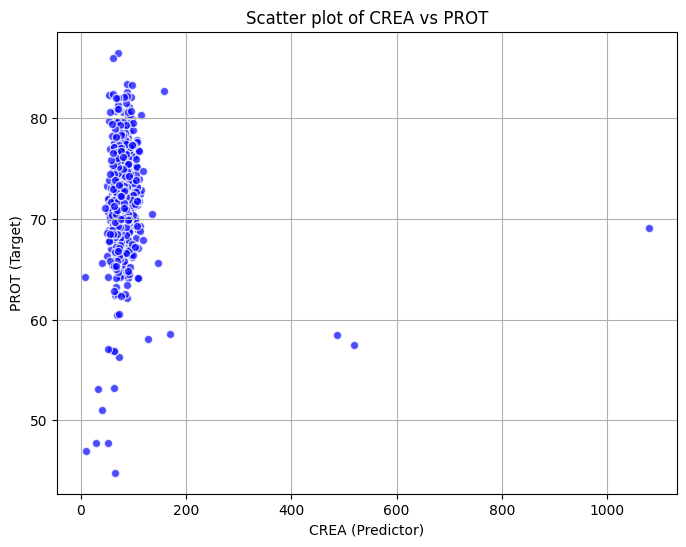

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, c='blue', edgecolor="white")
plt.title('Scatter plot of CREA vs PROT')
plt.xlabel('CREA (Predictor)')
plt.ylabel('PROT (Target)')
plt.grid(True)
plt.show()

The data is scattered adn relationship is weak

In [16]:
model=LinearRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [20]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.00362626]
Intercept: 72.21331496647235


In [21]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
print('Training MSE:', train_mse)
print('Test MSE:', test_mse)
print('Training R2 Score:', train_r2)
print('Test R2 Score:', test_r2)

Training MSE: 28.84020207572904
Test MSE: 24.98052149031294
Training R2 Score: 0.001438312305032663
Test R2 Score: -0.00025751174954624645


This shows that there is less error in the training and testing phase, as the the mse is 28 and 24 repectively.
But the model performed poorly as the r2 score is very low for both traininf and testing

-----------------------------------------------------

#MULTIPLE LINEAR REGRESSION

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xnew=datanew[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']]

vif=pd.Series([variance_inflation_factor(Xnew.values,idx)
    for idx in range(Xnew.shape[1])],
    index=Xnew.columns)

print(vif)

ALB     31.162740
ALP     10.024253
ALT      3.184002
AST      2.938453
BIL      1.678633
CHE     22.397373
CHOL    27.238712
CREA     3.656226
GGT      2.542260
dtype: float64


Based on these values we select the ALT, AST, BIL, BIL, CREA, GGT as our updated new set of predictors

In [23]:
Xnew=datanew[['ALT', 'AST', 'BIL', 'BIL', 'CREA', 'GGT']]
y=datanew['PROT']

In [24]:
from sklearn.model_selection import train_test_split

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2, random_state=42)


In [25]:
model1 = LinearRegression()
model1.fit(Xnew_train, y_train)

train_predictions_new = model1.predict(Xnew_train)
test_predictions_new = model1.predict(Xnew_test)

In [26]:
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)

Coefficients: [ 0.00396039 -0.00654952  0.00557664  0.00557664 -0.00344648 -0.00353636]
Intercept: 72.31340128263405


In [27]:
trainnew_mse = mean_squared_error(y_train, train_predictions_new)
testnew_mse = mean_squared_error(y_test, test_predictions_new)

train_r2_new = r2_score(y_train, train_predictions_new)
test_r2_new = r2_score(y_test, test_predictions_new)
print('Training MSE:', trainnew_mse)
print('Test MSE:', testnew_mse)
print('Training R2 Score:', train_r2_new)
print('Test R2 Score:', test_r2_new)

Training MSE: 28.764418064898045
Test MSE: 25.811990611900118
Training R2 Score: 0.004062254035987922
Test R2 Score: -0.033550781266673324


Again, here the mse values havent changed much, it is 28 for training and 25 for testing.
The r2 score is very low which says our model is very poor. 0.004 for train and negative 0.03 for test.

------------------------------------------------------

#POLYNOMIAL REGRESSION

In [28]:
X_poly=datanew[['ALB','ALP','CHE','CHOL']]

y=datanew['PROT']

We are taking the predictors with the highest vif values, they are : ALB,ALP,CHE,CHOL


Results for Degree 2:
Training R2 Score: 0.001438312305032663
Test R2 Score: -0.00025751174954624645
Training MSE: 15.548123040129719
Test MSE: 18.727423907907806


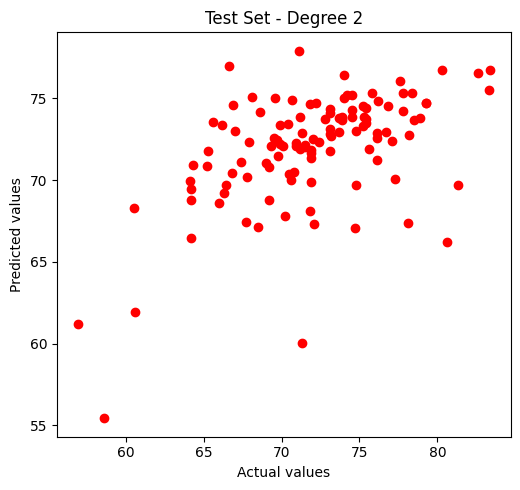


Results for Degree 3:
Training R2 Score: 0.001438312305032663
Test R2 Score: -0.00025751174954624645
Training MSE: 42.15565005259956
Test MSE: 60.776740948538894


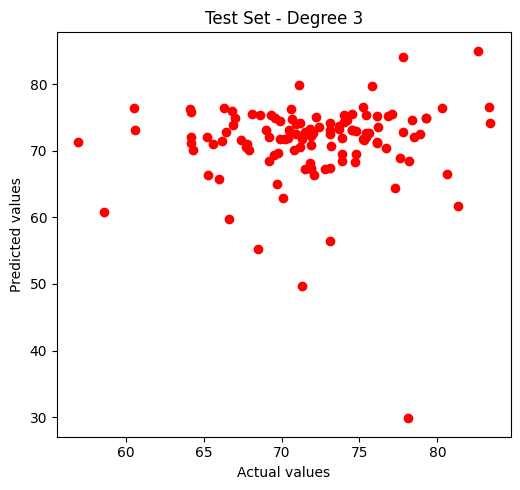


Results for Degree 4:
Training R2 Score: 0.001438312305032663
Test R2 Score: -0.00025751174954624645
Training MSE: 16.943628521884527
Test MSE: 102.57693656767769


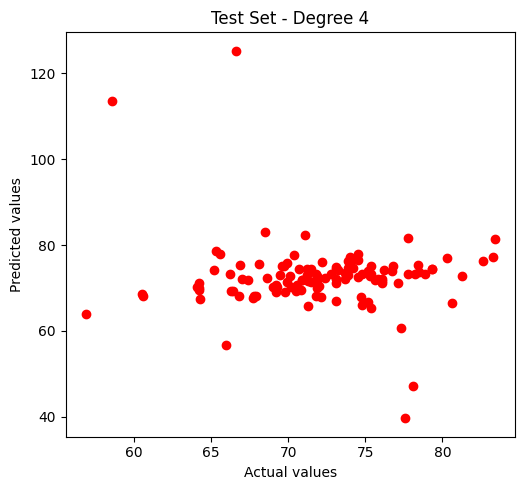

In [29]:
Xpoly_train, Xpoly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]  # Degrees

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(Xpoly_train)
    X_test_poly = poly.transform(Xpoly_test)

    polymodel = LinearRegression()
    polymodel .fit(X_train_poly, y_train)


    train_predictions_poly = polymodel.predict(X_train_poly)
    test_predictions_poly = polymodel.predict(X_test_poly)


    train_r2poly = r2_score(y_train, train_predictions_poly)
    test_r2poly = r2_score(y_test, test_predictions_poly)

    train_msepoly = mean_squared_error(y_train, train_predictions_poly)
    test_msepoly = mean_squared_error(y_test, test_predictions_poly)

    print(f'\nResults for Degree {degree}:')
    print('Training R2 Score:', train_r2)
    print('Test R2 Score:', test_r2)
    print('Training MSE:', train_msepoly)
    print('Test MSE:', test_msepoly)

    plt.figure(figsize=(10, 5))


    plt.subplot(1, 2, 2)
    plt.scatter(y_test, test_predictions_poly , color='red')
    # plt.scatter(y_train,y_train,color='blue')
    plt.title(f'Test Set - Degree {degree}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')

    plt.tight_layout()
    plt.show()

As we can see from the results, with change 3 diff degrees 2,3 and 4, there is no much differenc in the the r2 score or accuracy of the model.
Therefore we can see that the polynomial regression in this case is of not much use.

------------------------------------------------------------------------------

#RIDGE REGRESSION


In [30]:
Xridge=datanew[['ALB']] #ALB has the highest vif value
y=datanew['PROT']

In [31]:
Xridge_train, Xridge_test, y_train, y_test = train_test_split(Xridge, y, test_size=0.2, random_state=42)


In [35]:
alphas = np.linspace(0.1, 150, 13)
#we are taking 13 random values of alphs ranging from 0.1 adn 150
results = {'Alpha': [], 'R2 Score': [], 'MSE': []}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(Xridge_train, y_train)

    train_predictionsofridge = ridge.predict(Xridge_train)
    test_predictionsofridge = ridge.predict(Xridge_test)

    trainr2_ridge = r2_score(y_train, train_predictionsofridge)
    testr2_ridge = r2_score(y_test, test_predictionsofridge)

    train_mse_ridge = mean_squared_error(y_train, train_predictionsofridge)
    test_mse_ridge = mean_squared_error(y_test, test_predictionsofridge)

    results['Alpha'].append(alpha)
    results['R2 Score'].append(testr2_ridge)
    results['MSE'].append(test_mse_ridge)

results_df = pd.DataFrame(results)
print(results_df)

         Alpha  R2 Score        MSE
0     0.100000  0.196649  20.062958
1    12.591667  0.196823  20.058612
2    25.083333  0.196996  20.054287
3    37.575000  0.197169  20.049982
4    50.066667  0.197340  20.045698
5    62.558333  0.197511  20.041434
6    75.050000  0.197681  20.037191
7    87.541667  0.197850  20.032969
8   100.033333  0.198018  20.028766
9   112.525000  0.198186  20.024584
10  125.016667  0.198352  20.020422
11  137.508333  0.198518  20.016280
12  150.000000  0.198683  20.012158


#Inference
We have changed the alpha values randomly from the range between 0.1 and 150.
Random alpha values were taken and models were created and evalueated for each one of them.
For evaluation the r2 score and mse values are calculated.
the results obained were as shown above.
although we took 13 different values fro alpha randomly, the r2 scores and mse values for all the models were almost the same.
There isnt much variation between the values.

this may indicate that the model may not be much affected by noise or unwanted features. The model migght not be overfitting, therefore taking this penalty coefficient may not be required.

-------------------------------------------------------------------------------

#LASSO REGRESSION

In [37]:
Xlasso=datanew[['ALB']]
y=datanew['PROT']

In [40]:

Xlasso_train, Xlasso_test, y_train, y_test = train_test_split(Xlasso, y, test_size=0.2, random_state=42)

# for lasso we are taking the alpha values as 0.1,25,50 and 100
alpha_values = [0.1, 25, 50, 100]

for alpha in alpha_values:

    lasso = Lasso(alpha=alpha)

    lasso.fit(Xlasso_train, y_train)

    train_predictionsoflasso = ridge.predict(Xlasso_train)
    test_predictionsoflasso = ridge.predict(Xlasso_test)

    # r2 = r2_score(y_test, test_predictionsoflasso)
    # mse = mean_squared_error(y_test, test_predictionsoflasso)

    r2 = r2_score(y_test, test_predictionsoflasso)
    mse = mean_squared_error(y_test, test_predictionsoflasso)

    print(f"Alpha: {alpha}, R2 Score: {r2}, MSE: {mse}")

Alpha: 0.1, R2 Score: 0.19868321017897006, MSE: 20.0121579228739
Alpha: 25, R2 Score: 0.19868321017897006, MSE: 20.0121579228739
Alpha: 50, R2 Score: 0.19868321017897006, MSE: 20.0121579228739
Alpha: 100, R2 Score: 0.19868321017897006, MSE: 20.0121579228739
